## 1) Import Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 10000
import seaborn as sns
sns.set_theme(style="white", palette='pastel')
%matplotlib inline
pd.options.display.max_columns = None

In [2]:
df_backup = pd.read_csv('loan_data_2007_2014.csv')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (20) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df = df_backup.iloc[:,1:].copy()

In [4]:
df.head(3)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.0,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.0,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.0,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#sorted(df.columns.values)

In [6]:
del_columns = 'all_util, annual_inc_joint, application_type, collection_recovery_fee, collections_12_mths_ex_med, desc, '\
             +'dti_joint, emp_title, funded_amnt_inv, id, il_util, inq_fi, inq_last_12m, last_credit_pull_d, last_pymnt_amnt, '\
             +'last_pymnt_d, loan_amnt, max_bal_bc, member_id, mths_since_last_delinq, mths_since_last_major_derog, '\
             +'mths_since_last_record, mths_since_rcnt_il, next_pymnt_d, open_acc_6m, open_il_12m, open_il_24m, open_il_6m, '\
             +'open_rv_12m, open_rv_24m, out_prncp_inv, policy_code, recoveries, revol_bal, revol_util, title, tot_coll_amt, '\
             +'tot_cur_bal, total_bal_il, total_cu_tl, total_pymnt_inv, total_rec_late_fee, url, verification_status_joint, '\
             +'zip_code'

In [7]:
df.drop(del_columns.split(', '), axis=1, inplace=True)
df.head(3)

,funded_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim
0,5000,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,credit_card,AZ,27.65,0.0,Jan-85,1.0,3.0,0.0,9.0,f,0.0,5861.071414,5000.00,861.07,0.0,NaN
1,2500,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,car,GA,1.00,0.0,Apr-99,5.0,3.0,0.0,4.0,f,0.0,1008.710000,456.46,435.17,0.0,NaN
2,2400,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,small_business,IL,8.72,0.0,Nov-01,2.0,2.0,0.0,10.0,f,0.0,3003.653644,2400.00,603.65,0.0,NaN


In [8]:
#df.info()

## 2) Data cleaning

### 2.a. Change type from object to numeric for following columns:<br><br>term, emp_length, earliest_cr_line, issue_date

In [9]:
df['term'].unique()

array([' 36 months', ' 60 months'], dtype=object)

In [10]:
df['term_int'] = df['term'].str[1:3]
df['term_int'] = pd.to_numeric(df['term_int'])
df['term_int'].unique()

array([36, 60], dtype=int64)

In [11]:
df['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [12]:
df['emp_length_int'] = df['emp_length'].str.replace('\+ years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace('< 1 year', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace('n/a', str(0))
df['emp_length_int'] = df['emp_length_int'].str.replace(' years', '')
df['emp_length_int'] = df['emp_length_int'].str.replace(' year', '')
df['emp_length_int'] = pd.to_numeric(df['emp_length_int'])
df['emp_length_int'].unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [13]:
df['earliest_cr_line'].head(3).unique()

array(['Jan-85', 'Apr-99', 'Nov-01'], dtype=object)

In [14]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line'], format = '%b-%y')
df['mths_since_earliest_cr_line'] = round((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date'])/np.timedelta64(1, 'M'))
df['mths_since_earliest_cr_line'].head(3).unique()

array([395., 224., 193.])

In [15]:
df['mths_since_earliest_cr_line'].describe().head(4)

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [16]:
df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line']<0] = df['mths_since_earliest_cr_line'].max()

<ipython-input-16-e92e430f66ab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mths_since_earliest_cr_line'][df['mths_since_earliest_cr_line']<0] = df['mths_since_earliest_cr_line'].max()


In [17]:
min(df['mths_since_earliest_cr_line'])

73.0

In [18]:
df['issue_d'].unique()[:3]

array(['Dec-11', 'Nov-11', 'Oct-11'], dtype=object)

In [19]:
df['issue_d_date'] = pd.to_datetime(df['issue_d'], format = '%b-%y')
df['mths_since_issue_d'] = round((pd.to_datetime('2017-12-01') - df['issue_d_date'])/np.timedelta64(1, 'M'))
df['mths_since_issue_d'].unique()[:3]

array([72., 73., 74.])

In [20]:
df.drop(['term', 'emp_length', 'earliest_cr_line', 'earliest_cr_line_date', 'issue_d', 'issue_d_date'], axis=1, inplace=True)
df.head(3)

,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d
0,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,Fully Paid,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,9.0,f,0.0,5861.071414,5000.00,861.07,0.0,NaN,36,10.0,395.0,72.0
1,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,Charged Off,n,car,GA,1.00,0.0,5.0,3.0,0.0,4.0,f,0.0,1008.710000,456.46,435.17,0.0,NaN,60,0.0,224.0,72.0
2,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,Fully Paid,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,10.0,f,0.0,3003.653644,2400.00,603.65,0.0,NaN,36,10.0,193.0,72.0


### 2.b. Fill columns with missing values:<br><br>i) Replace values with 0: emp_length_int, delinq_2yrs, mths_since_earliest_cr_line, inq_last_6mths, open_acc, pub_rec, total_acc, acc_now_delinq<br>ii) Replace values with funded amount: total_rev_hi_lim<br>iii) Replace values with the column average: annual_inc

In [21]:
df.isnull().sum().sum()

91491

In [22]:
df['emp_length_int'].fillna(0, inplace=True)
df['delinq_2yrs'].fillna(0, inplace=True)
df['mths_since_earliest_cr_line'].fillna(0, inplace=True)
df['inq_last_6mths'].fillna(0, inplace=True)
df['open_acc'].fillna(0, inplace=True)
df['pub_rec'].fillna(0, inplace=True)
df['total_acc'].fillna(0, inplace=True)
df['acc_now_delinq'].fillna(0, inplace=True)
df['total_rev_hi_lim'].fillna(df['funded_amnt'], inplace=True)
df['annual_inc'].fillna(df['annual_inc'].mean(), inplace=True)

In [23]:
df.isnull().sum().sum()

0

In [24]:
#df.nunique()

### 2.c. Create the target variable from loan status column

In [25]:
df['good_bad'] = np.where(df['loan_status'].isin(['Charged Off', 'Default',
                                                           'Does not meet the credit policy. Status:Charged Off',
                                                           'Late (31-120 days)']), 0, 1)
df.drop(['loan_status'], axis=1, inplace=True)
df.head(3)

,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad
0,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,9.0,f,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1
1,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,3.0,0.0,4.0,f,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0
2,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,10.0,f,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1


## 3) Correlation visualizations

### 3.a. Discrete columns

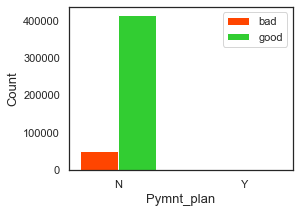

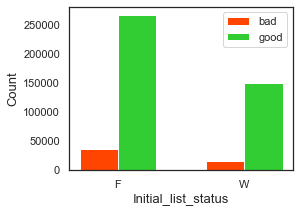

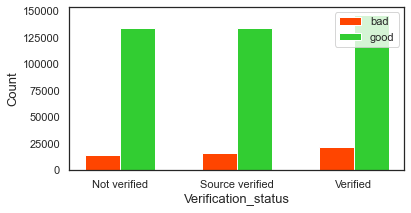

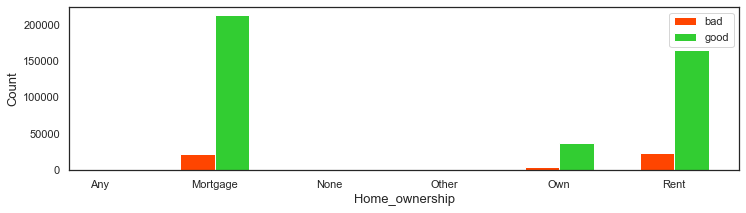

In [26]:
categorical_cols = ['pymnt_plan', 'initial_list_status', 'verification_status', 'home_ownership']
cap_label = np.vectorize(str.capitalize)
for col_name in categorical_cols:
    xtick_rot = 0
    if col_name in ['sub_grade']:
        xtick_rot = 90
    plot_df = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad')
    x = cap_label(df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').index.values)
    n_cat = len(x)
    bar_width = 0.3
    br1 = np.arange(n_cat)
    br2 = [x + bar_width for x in br1]
    y_bad = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,0].values
    y_good = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,1].values
    plt.figure(figsize=(2*n_cat,3))
    plt.bar(br1, y_bad, color='orangered', label='bad', width = bar_width) 
    plt.bar(br2, y_good, color ='limegreen', label='good', width = bar_width)
    plt.xlabel(str.capitalize(col_name), fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.xticks([r + bar_width/2 for r in range(n_cat)], x, rotation=xtick_rot)
    plt.legend(loc='upper right')

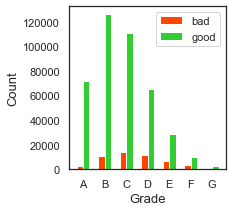

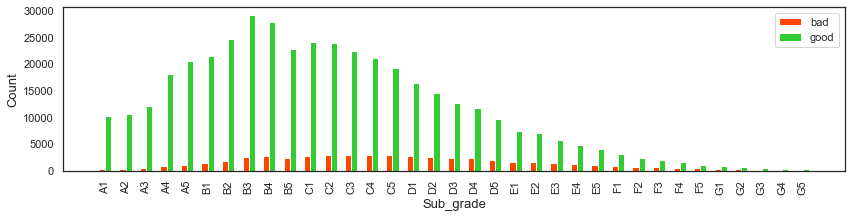

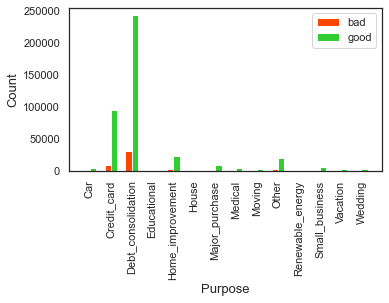

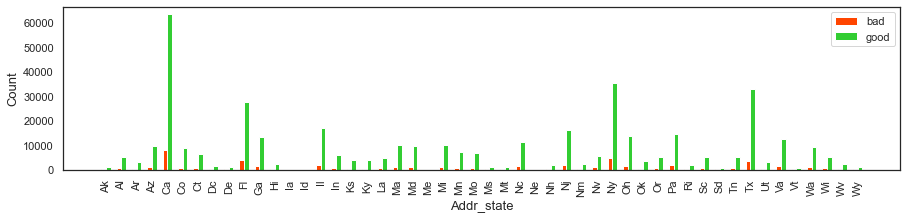

In [27]:
categorical_cols = ['grade', 'sub_grade', 'purpose', 'addr_state']
cap_label = np.vectorize(str.capitalize)
for col_name in categorical_cols:
    xtick_rot = 0
    if col_name in ['sub_grade', 'purpose', 'addr_state']:
        xtick_rot = 90
    plot_df = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad')
    x = cap_label(df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').index.values)
    n_cat = len(x)
    bar_width = 0.3
    br1 = np.arange(n_cat)
    br2 = [x + bar_width for x in br1]
    y_bad = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,0].values
    y_good = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,1].values
    if col_name == 'addr_state':
        plt.figure(figsize=(15,3))
    else:
        plt.figure(figsize=(n_cat/2.5,3))
    plt.bar(br1, y_bad, color='orangered', label='bad', width = bar_width) 
    plt.bar(br2, y_good, color ='limegreen', label='good', width = bar_width)
    plt.xlabel(str.capitalize(col_name), fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.xticks([r + bar_width/2 for r in range(n_cat)], x, rotation=xtick_rot)
    plt.legend(loc='upper right')

### 3.b. Continuous columns

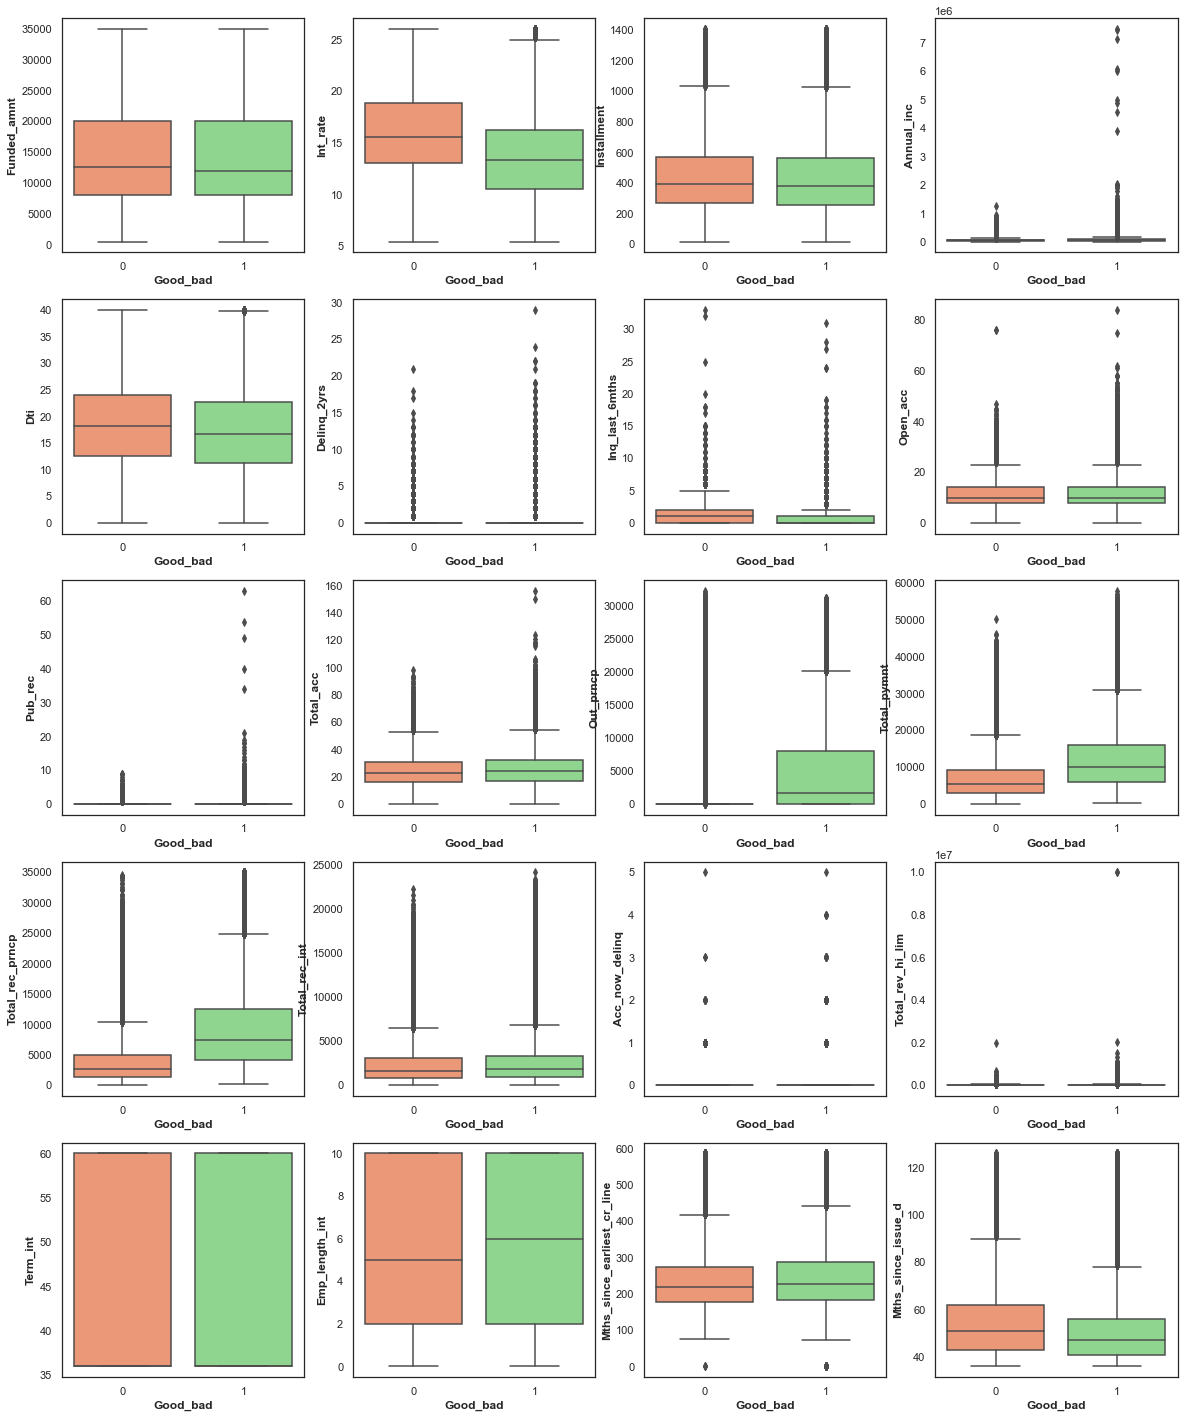

In [28]:
numerical_cols = ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths',
                  'open_acc', 'pub_rec', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 
                  'acc_now_delinq', 'total_rev_hi_lim', 'term_int', 'emp_length_int', 'mths_since_earliest_cr_line', 
                  'mths_since_issue_d']
fig, axes = plt.subplots(5, 4, figsize=(20,25))
k = -1
for i in range(5):
    for j in range(4):
        k = k + 1
        col_name = numerical_cols[k]
        ax = sns.boxplot(ax=axes[i, j], data=df, x='good_bad', y=col_name, palette=['orangered', 'limegreen'])
        for patch in ax.artists:
            r, g, b, a = patch.get_facecolor()
            patch.set_facecolor((r, g, b, 0.6))
        ax.set_xlabel('Good_bad', weight='bold')
        ax.set_ylabel(str.capitalize(col_name), weight='bold')

## 4) Fine Classing and Coarse Classing

### 4.a. Function definitions for getting grouped classes

In [29]:
def get_woe_matrix(df, col_name, discrete=True, sort_index=False, cutoff=10.0, multiplier=1.0):
    num_fine_lvls = df[col_name].nunique()
    woe_mat = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad')
    woe_mat[0].fillna(0, inplace=True)
    woe_mat[1].fillna(0, inplace=True)
    woe_mat.iloc[:,[0,1]].fillna(0)
    woe_mat['pct_good'] = woe_mat[1]/woe_mat[1].sum()
    woe_mat['pct_bad'] = woe_mat[0]/woe_mat[0].sum()
    woe_mat['num_obs'] = woe_mat[0]+woe_mat[1]
    woe_value = np.log(woe_mat['pct_good']/woe_mat['pct_bad'])
    woe_mat['woe'] = np.where(np.isinf(woe_value), np.nan,
                     np.where(np.isinf(-woe_value), np.nan, woe_value))         
    woe_mat['pct_obs'] = (woe_mat[0]+woe_mat[1])/(woe_mat[0].sum()+woe_mat[1].sum())*100
    if discrete:
        cutoff = 100.0/len(woe_mat)
    woe_mat['cutoff'] = cutoff
    woe_mat['info_val'] = ((woe_mat['pct_good']-woe_mat['pct_bad'])*woe_mat['woe']).sum()
    if not sort_index:
        woe_mat = woe_mat.sort_values(by='woe', ascending=True)
    all_levels = []
    current_sum = 0
    current_lvl = []
    num_coarse_lvls = 0
    for i in range(len(woe_mat)):
        current_sum += woe_mat.iloc[i, 6]
        current_lvl.append(woe_mat.index.values[i]) 
        if current_sum >= multiplier*cutoff:
            current_sum = 0
            all_levels.append(current_lvl)
            current_lvl = []
            num_coarse_lvls += 1
    return (woe_mat, woe_mat['info_val'].iloc[0], num_fine_lvls, num_coarse_lvls, all_levels)

In [30]:
def plot_woe(df, col_name, x_tick_rot=0, font_size=9):
    woe_mat = get_woe_matrix(df, col_name)[0]
    x = woe_mat.index.values
    y = woe_mat['woe']
    n_cat = len(x)
    plt.figure(figsize=(15,3))
    plt.plot(x, y, 'bo--')
    plt.xlabel(col_name)
    plt.ylabel('Weight of Evidence (WoE)')
    y_min, y_max = plt.ylim()
    plt.ylim(y_min-0.35, y_max+0.125)
    plt.yticks(np.arange((y_min-0.35)//1, (y_max+0.125)//1+1, 1))
    plt.xticks(rotation=x_tick_rot)
    for index in range(len(x)):
        if y[index] >= 0:
            plt.text(x[index], y[index]-0.35, round(y[index],2), horizontalalignment='center', color='green', fontsize=font_size)
        else:
            plt.text(x[index], y[index]-0.35, abs(round(y[index],2)), horizontalalignment='center', color='red', fontsize=font_size)
    return

good_bad,0,1,pct_good,pct_bad,num_obs,woe,pct_obs,cutoff,info_val
grade,,,,,,,,,
G,924,2398,0.005774,0.018129,3322,-1.144166,0.712440,14.285714,0.290782
F,3192,10037,0.024167,0.062628,13229,-0.952214,2.837106,14.285714,0.290782
E,6964,28793,0.069328,0.136635,35757,-0.678466,7.668486,14.285714,0.290782
D,11848,65040,0.156603,0.232460,76888,-0.395001,16.489486,14.285714,0.290782
C,14384,110909,0.267047,0.282216,125293,-0.055251,26.870476,14.285714,0.290782
B,10759,126170,0.303792,0.211093,136929,0.364043,29.365946,14.285714,0.290782
A,2897,71970,0.173289,0.056840,74867,1.114730,16.056060,14.285714,0.290782


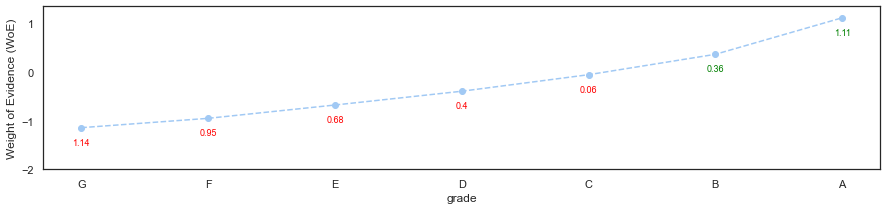

In [31]:
col_name = 'grade'
plot_woe(df, col_name);
get_woe_matrix(df, col_name)[0]

### 4.b. Coarse Classing and fine classing: Discrete columns

In [32]:
categorical_cols = ['pymnt_plan', 'initial_list_status', 'verification_status', 'home_ownership', 'grade', 'sub_grade', 'purpose', 'addr_state']
init_classes = [df[col_name].nunique() for col_name in categorical_cols]
final_classes = [get_woe_matrix(df, col_name)[2] for col_name in categorical_cols]
info_value = [get_woe_matrix(df, col_name)[1] for col_name in categorical_cols]
cat_col_desc = pd.DataFrame(data=[init_classes, final_classes, info_value], columns=categorical_cols, index=['num_initial_classes','num_final_classes', 'information_value'])
cat_col_desc = cat_col_desc.transpose()
cat_col_desc['predictive_power'] = np.where(cat_col_desc['information_value']<0.02, "None",
                                   np.where(cat_col_desc['information_value']<0.1, "Weak",
                                   np.where(cat_col_desc['information_value']<0.3, "Medium",
                                   np.where(cat_col_desc['information_value']<0.5, "Strong", "Suspiciously High"))))
cat_col_desc

,num_initial_classes,num_final_classes,information_value,predictive_power
pymnt_plan,2.0,2.0,0.000125,None
initial_list_status,2.0,2.0,0.024801,Weak
verification_status,3.0,3.0,0.020831,Weak
home_ownership,6.0,6.0,0.021662,Weak
grade,7.0,7.0,0.290782,Medium
sub_grade,35.0,35.0,0.315180,Strong
purpose,14.0,14.0,0.036980,Weak
addr_state,50.0,50.0,0.012518,None


In [33]:
df.head(3)

,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad
0,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,9.0,f,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1
1,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,3.0,0.0,4.0,f,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0
2,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,10.0,f,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1


In [34]:
grouping_cols = ['home_ownership', 'grade', 'sub_grade', 'purpose', 'addr_state']
for col_name in grouping_cols:
    all_classes = get_woe_matrix(df, col_name)[-1]
    for group in all_classes:
        df[col_name+'_coarse : '+' '.join(group)] = df[col_name].isin(group).astype('int')
df.head(3)

,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,home_ownership_coarse : OTHER NONE RENT,home_ownership_coarse : OWN MORTGAGE,grade_coarse : G F E D,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : small_business educational renewable_energy moving house other,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : NE IA NV HI FL,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC
0,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,9.0,f,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,3.0,0.0,4.0,f,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,10.0,f,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [35]:
df_dummies = [pd.get_dummies(df['pymnt_plan'], prefix='pymnt_plan', prefix_sep='_fine : '),
              pd.get_dummies(df['initial_list_status'], prefix='initial_list_status', prefix_sep='_fine : '),
              pd.get_dummies(df['verification_status'], prefix='verification_status', prefix_sep='_fine : ')]
df_dummies = pd.concat(df_dummies, axis=1)
df = pd.concat([df, df_dummies], axis=1)
df.head(3)

,funded_amnt,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,initial_list_status,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,home_ownership_coarse : OTHER NONE RENT,home_ownership_coarse : OWN MORTGAGE,grade_coarse : G F E D,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : small_business educational renewable_energy moving house other,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : NE IA NV HI FL,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC,pymnt_plan_fine : n,pymnt_plan_fine : y,initial_list_status_fine : f,initial_list_status_fine : w,verification_status_fine : Not Verified,verification_status_fine : Source Verified,verification_status_fine : Verified
0,5000,10.65,162.87,B,B2,RENT,24000.0,Verified,n,credit_card,AZ,27.65,0.0,1.0,3.0,0.0,9.0,f,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,2500,15.27,59.83,C,C4,RENT,30000.0,Source Verified,n,car,GA,1.00,0.0,5.0,3.0,0.0,4.0,f,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,2400,15.96,84.33,C,C5,RENT,12252.0,Not Verified,n,small_business,IL,8.72,0.0,2.0,2.0,0.0,10.0,f,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


In [36]:
df.drop(['pymnt_plan', 'initial_list_status', 'verification_status', 'home_ownership', 'grade', 'sub_grade', 'purpose', 
         'addr_state'], axis=1, inplace=True)
df.head(3)

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,home_ownership_coarse : OTHER NONE RENT,home_ownership_coarse : OWN MORTGAGE,grade_coarse : G F E D,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : small_business educational renewable_energy moving house other,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : NE IA NV HI FL,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC,pymnt_plan_fine : n,pymnt_plan_fine : y,initial_list_status_fine : f,initial_list_status_fine : w,verification_status_fine : Not Verified,verification_status_fine : Source Verified,verification_status_fine : Verified
0,5000,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,9.0,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1
1,2500,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,4.0,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0
2,2400,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,10.0,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0


### 4.c. Coarse classing and fine classing: Continuous columns

In [37]:
df.iloc[:,:20].nunique()

funded_amnt                      1354
int_rate                          506
installment                     55622
annual_inc                      31902
dti                              3997
delinq_2yrs                        24
inq_last_6mths                     28
open_acc                           62
pub_rec                            26
total_acc                         113
out_prncp                      135665
total_pymnt                    351609
total_rec_prncp                172713
total_rec_int                  270249
acc_now_delinq                      6
total_rev_hi_lim                14933
term_int                            2
emp_length_int                     11
mths_since_earliest_cr_line       516
mths_since_issue_d                 91
dtype: int64

#### 4.c.i. Normal coarse classing

In [38]:
# Set class cutoff = 10%

group_cont_cols = ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'total_acc', 'out_prncp', 
                   'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rev_hi_lim','mths_since_earliest_cr_line', 
                   'mths_since_issue_d']

i = 0

for col_name in group_cont_cols:
    
    init_classes, num_classes, all_classes = get_woe_matrix(df, col_name, discrete=False, sort_index=True, cutoff=10.0)[2:]
    
    for i in range(len(all_classes)):
        
        curr_group = all_classes[i]
        
        if len(curr_group) == 1:
            curr_left, curr_right = (float(curr_group[0]), float(curr_group[0]))
        else:
            curr_left, curr_right = (float(curr_group[0]), float(curr_group[1]))
        
        if i != 0 and i != len(all_classes)-1:
            prev_group = all_classes[i-1]
            next_group = all_classes[i+1]
            if len(prev_group) == 1:
                prev_right = float(prev_group[0])
            else:
                prev_right = float(prev_group[1])
            next_left = float(next_group[0])
            left_exc = (prev_right + curr_left)/2
            right_inc = (curr_right + next_left)/2
        
        elif i == 0:
            left_exc = 0
            next_left = float(all_classes[i+1][0])
            right_inc = (curr_right + next_left)/2
        
        else:
            prev_group = all_classes[i-1]
            if len(prev_group) == 1:
                prev_right = float(prev_group[0])
            else:
                prev_right = float(prev_group[1])           
            left_exc = (prev_right + curr_left)/2
            right_inc = float('inf')
        
        prefix = (2-len(str(i)))*'0'+str(i)
        label = prefix+' : '+str(round(left_exc,2))+' - '+str(round(right_inc,2))
        df.loc[df[col_name].between(left_exc, right_inc, inclusive='right')==True, col_name+" : class"] = label
    
#     print(col_name, init_classes, num_classes)

df.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = geta

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,home_ownership_coarse : OTHER NONE RENT,home_ownership_coarse : OWN MORTGAGE,grade_coarse : G F E D,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : small_business educational renewable_energy moving house other,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : NE IA NV HI FL,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC,pymnt_plan_fine : n,pymnt_plan_fine : y,initial_list_status_fine : f,initial_list_status_fine : w,verification_status_fine : Not Verified,verification_status_fine : Source Verified,verification_status_fine : Verified,funded_amnt : class,int_rate : class,installment : class,annual_inc : class,dti : class,open_acc : class,total_acc : class,out_prncp : class,total_pymnt : class,total_rec_prncp : class,total_rec_int : class,total_rev_hi_lim : class,mths_since_earliest_cr_line : class,mths_since_issue_d : class
0,5000,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,9.0,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,01 : 2787.5 - 6237.5,02 : 9.08 - 10.96,01 : 89.39 - 194.75,01 : 18001.0 - 38006.5,08 : 22.87 - inf,00 : 0 - 4.0,01 : 7.0 - 15.5,00 : 0 - 0.01,03 : 5546.35 - 6971.52,04 : 4830.41 - 6116.19,02 : 657.88 - 961.11,01 : 3407.5 - 8365.0,08 : 296.5 - inf,07 : 61.0 - inf
1,2500,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,4.0,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,00 : 0 - 2787.5,06 : 14.72 - 16.2,00 : 0 - 89.39,01 : 18001.0 - 38006.5,00 : 0 - 3.52,00 : 0 - 4.0,00 : 0 - 7.0,00 : 0 - 0.01,00 : 0 - 1674.72,00 : 0 - 1082.51,01 : 252.7 - 657.88,00 : 0 - 3407.5,05 : 220.5 - 240.5,07 : 61.0 - inf
2,2400,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,10.0,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,00 : 0 - 2787.5,06 : 14.72 - 16.2,00 : 0 - 89.39,00 : 0 - 18001.0,02 : 8.58 - 11.34,00 : 0 - 4.0,01 : 7.0 - 15.5,00 : 0 - 0.01,01 : 1674.72 - 4084.7,01 : 1082.51 - 2672.7,01 : 252.7 - 657.88,00 : 0 - 3407.5,03 : 185.0 - 203.5,07 : 61.0 - inf


#### 4.c.ii. Coarse classing with smaller class sizes

In [39]:
# Set class cutoff = 0.1%

group_cont_cols = ['delinq_2yrs', 'inq_last_6mths', 'pub_rec']

i = 0

for col_name in group_cont_cols:
    
    init_classes, num_classes, all_classes = get_woe_matrix(df, col_name, discrete=False, sort_index=True, cutoff=0.1)[2:]
    
    for i in range(len(all_classes)):
        
        curr_group = all_classes[i]
        
        if len(curr_group) == 1:
            curr_left, curr_right = (float(curr_group[0]), float(curr_group[0]))
        else:
            curr_left, curr_right = (float(curr_group[0]), float(curr_group[1]))
        
        if i != 0 and i != len(all_classes)-1:
            prev_group = all_classes[i-1]
            next_group = all_classes[i+1]
            if len(prev_group) == 1:
                prev_right = float(prev_group[0])
            else:
                prev_right = float(prev_group[1])
            next_left = float(next_group[0])
            left_exc = (prev_right + curr_left)/2
            right_inc = (curr_right + next_left)/2
        
        elif i == 0:
            left_exc = 0
            next_left = float(all_classes[i+1][0])
            right_inc = (curr_right + next_left)/2
        
        else:
            prev_group = all_classes[i-1]
            if len(prev_group) == 1:
                prev_right = float(prev_group[0])
            else:
                prev_right = float(prev_group[1])           
            left_exc = (prev_right + curr_left)/2
            right_inc = float('inf')
        
        prefix = (2-len(str(i)))*'0'+str(i)
        label = prefix+' : '+str(round(left_exc,2))+' - '+str(round(right_inc,2))
        df.loc[df[col_name].between(left_exc, right_inc, inclusive='right')==True, col_name+" : class"] = label
    
#     print(col_name, init_classes, num_classes)

df.head(3)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,home_ownership_coarse : OTHER NONE RENT,home_ownership_coarse : OWN MORTGAGE,grade_coarse : G F E D,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : small_business educational renewable_energy moving house other,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : NE IA NV HI FL,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC,pymnt_plan_fine : n,pymnt_plan_fine : y,initial_list_status_fine : f,initial_list_status_fine : w,verification_status_fine : Not Verified,verification_status_fine : Source Verified,verification_status_fine : Verified,funded_amnt : class,int_rate : class,installment : class,annual_inc : class,dti : class,open_acc : class,total_acc : class,out_prncp : class,total_pymnt : class,total_rec_prncp : class,total_rec_int : class,total_rev_hi_lim : class,mths_since_earliest_cr_line : class,mths_since_issue_d : class,delinq_2yrs : class,inq_last_6mths : class,pub_rec : class
0,5000,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,9.0,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,01 : 2787.5 - 6237.5,02 : 9.08 - 10.96,01 : 89.39 - 194.75,01 : 18001.0 - 38006.5,08 : 22.87 - inf,00 : 0 - 4.0,01 : 7.0 - 15.5,00 : 0 - 0.01,03 : 5546.35 - 6971.52,04 : 4830.41 - 6116.19,02 : 657.88 - 961.11,01 : 3407.5 - 8365.0,08 : 296.5 - inf,07 : 61.0 - inf,00 : 0 - 0.5,01 : 0.5 - 1.5,00 : 0 - 0.5
1,2500,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,4.0,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,00 : 0 - 2787.5,06 : 14.72 - 16.2,00 : 0 - 89.39,01 : 18001.0 - 38006.5,00 : 0 - 3.52,00 : 0 - 4.0,00 : 0 - 7.0,00 : 0 - 0.01,00 : 0 - 1674.72,00 : 0 - 1082.51,01 : 252.7 - 657.88,00 : 0 - 3407.5,05 : 220.5 - 240.5,07 : 61.0 - inf,00 : 0 - 0.5,05 : 4.5 - 5.5,00 : 0 - 0.5
2,2400,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,10.0,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,00 : 0 - 2787.5,06 : 14.72 - 16.2,00 : 0 - 89.39,00 : 0 - 18001.0,02 : 8.58 - 11.34,00 : 0 - 4.0,01 : 7.0 - 15.5,00 : 0 - 0.01,01 : 1674.72 - 4084.7,01 : 1082.51 - 2672.7,01 : 252.7 - 657.88,00 : 0 - 3407.5,03 : 185.0 - 203.5,07 : 61.0 - inf,00 : 0 - 0.5,02 : 1.5 - 2.5,00 : 0 - 0.5


#### 4.c.iii. No classing

In [40]:
no_group_cols = ['acc_now_delinq', 'term_int', 'emp_length_int']

for col_name in no_group_cols:
    groups = sorted(df[col_name].unique())
    for i, val in enumerate(groups):
        df.loc[df[col_name]==val, col_name+" : class"] = '0'*(2-len(str(i)))+str(i)+" : "+str(val)

df.head(3)

,funded_amnt,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,total_acc,out_prncp,total_pymnt,total_rec_prncp,total_rec_int,acc_now_delinq,total_rev_hi_lim,term_int,emp_length_int,mths_since_earliest_cr_line,mths_since_issue_d,good_bad,home_ownership_coarse : OTHER NONE RENT,home_ownership_coarse : OWN MORTGAGE,grade_coarse : G F E D,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : small_business educational renewable_energy moving house other,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : NE IA NV HI FL,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC,pymnt_plan_fine : n,pymnt_plan_fine : y,initial_list_status_fine : f,initial_list_status_fine : w,verification_status_fine : Not Verified,verification_status_fine : Source Verified,verification_status_fine : Verified,funded_amnt : class,int_rate : class,installment : class,annual_inc : class,dti : class,open_acc : class,total_acc : class,out_prncp : class,total_pymnt : class,total_rec_prncp : class,total_rec_int : class,total_rev_hi_lim : class,mths_since_earliest_cr_line : class,mths_since_issue_d : class,delinq_2yrs : class,inq_last_6mths : class,pub_rec : class,acc_now_delinq : class,term_int : class,emp_length_int : class
0,5000,10.65,162.87,24000.0,27.65,0.0,1.0,3.0,0.0,9.0,0.0,5861.071414,5000.00,861.07,0.0,5000.0,36,10.0,395.0,72.0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,01 : 2787.5 - 6237.5,02 : 9.08 - 10.96,01 : 89.39 - 194.75,01 : 18001.0 - 38006.5,08 : 22.87 - inf,00 : 0 - 4.0,01 : 7.0 - 15.5,00 : 0 - 0.01,03 : 5546.35 - 6971.52,04 : 4830.41 - 6116.19,02 : 657.88 - 961.11,01 : 3407.5 - 8365.0,08 : 296.5 - inf,07 : 61.0 - inf,00 : 0 - 0.5,01 : 0.5 - 1.5,00 : 0 - 0.5,00 : 0.0,00 : 36,10 : 10.0
1,2500,15.27,59.83,30000.0,1.00,0.0,5.0,3.0,0.0,4.0,0.0,1008.710000,456.46,435.17,0.0,2500.0,60,0.0,224.0,72.0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,00 : 0 - 2787.5,06 : 14.72 - 16.2,00 : 0 - 89.39,01 : 18001.0 - 38006.5,00 : 0 - 3.52,00 : 0 - 4.0,00 : 0 - 7.0,00 : 0 - 0.01,00 : 0 - 1674.72,00 : 0 - 1082.51,01 : 252.7 - 657.88,00 : 0 - 3407.5,05 : 220.5 - 240.5,07 : 61.0 - inf,00 : 0 - 0.5,05 : 4.5 - 5.5,00 : 0 - 0.5,00 : 0.0,01 : 60,00 : 0.0
2,2400,15.96,84.33,12252.0,8.72,0.0,2.0,2.0,0.0,10.0,0.0,3003.653644,2400.00,603.65,0.0,2400.0,36,10.0,193.0,72.0,1,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,00 : 0 - 2787.5,06 : 14.72 - 16.2,00 : 0 - 89.39,00 : 0 - 18001.0,02 : 8.58 - 11.34,00 : 0 - 4.0,01 : 7.0 - 15.5,00 : 0 - 0.01,01 : 1674.72 - 4084.7,01 : 1082.51 - 2672.7,01 : 252.7 - 657.88,00 : 0 - 3407.5,03 : 185.0 - 203.5,07 : 61.0 - inf,00 : 0 - 0.5,02 : 1.5 - 2.5,00 : 0 - 0.5,00 : 0.0,00 : 36,1

## 5) Class distribution and Information Value (IV) for continuous columns

<ipython-input-41-f5efe644c913>:20: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(2*n_cat,3))


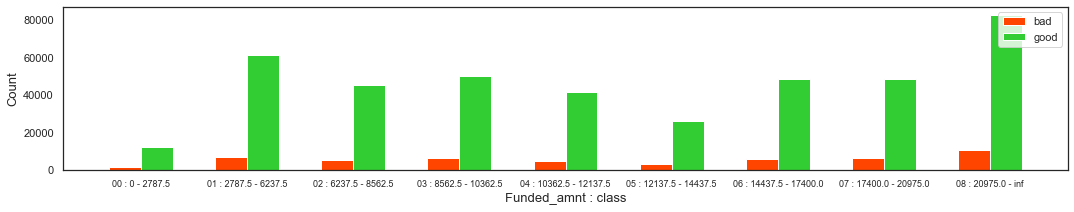

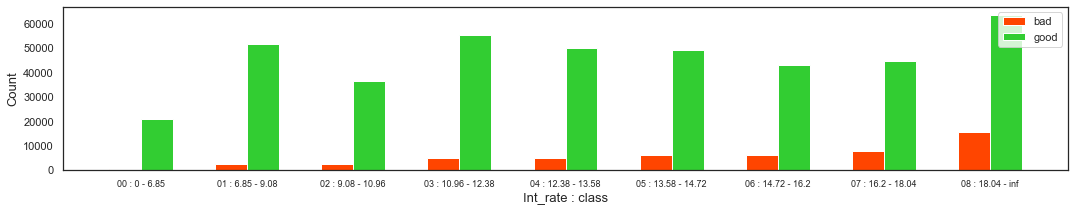

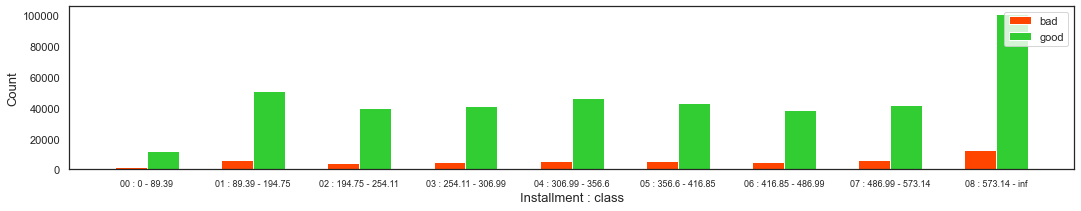

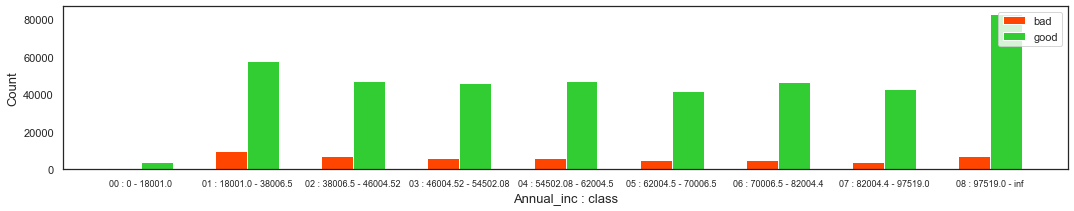

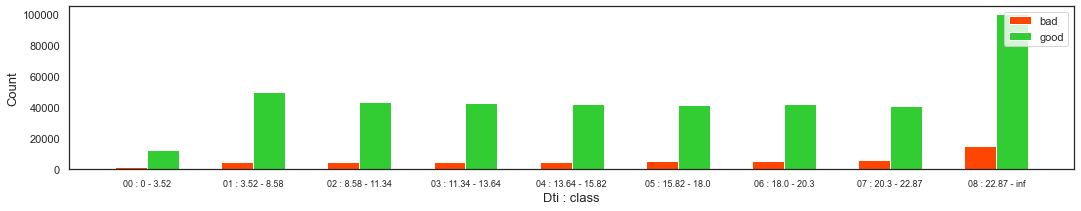

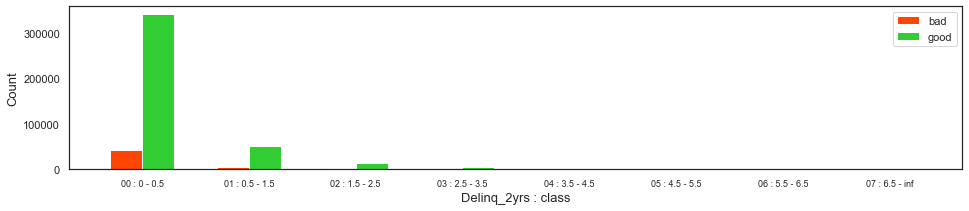

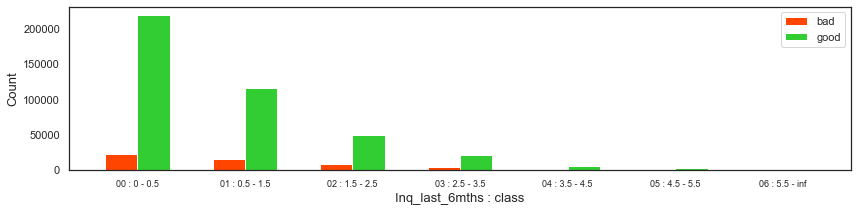

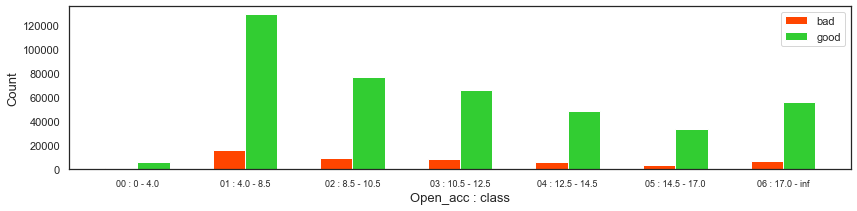

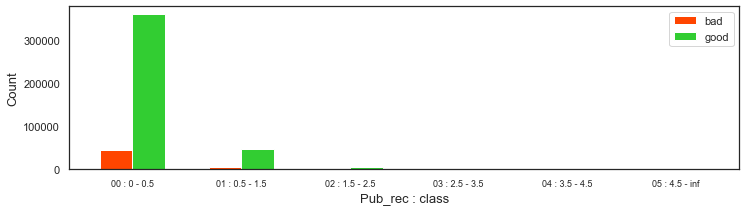

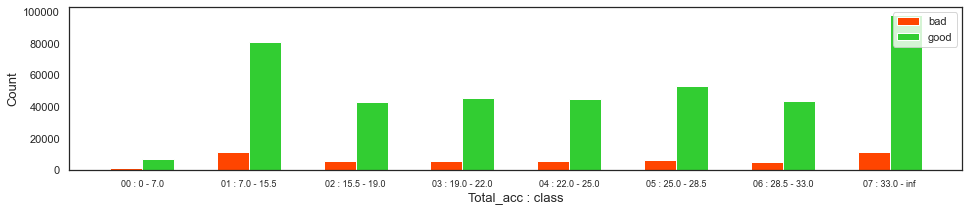

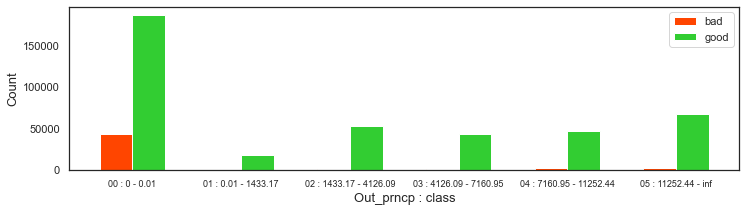

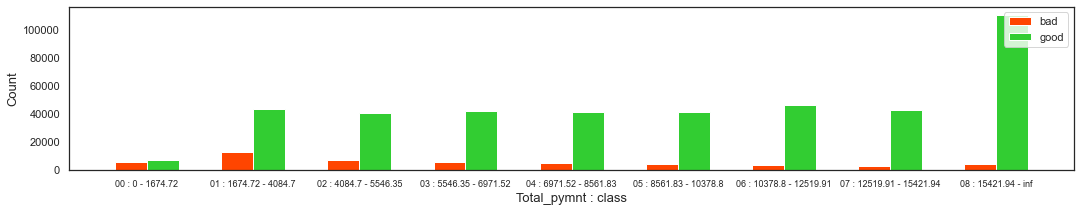

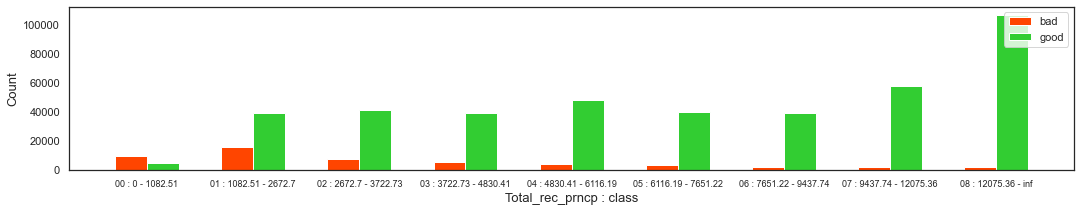

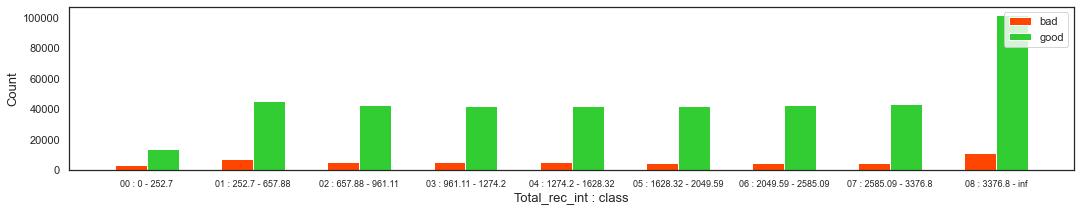

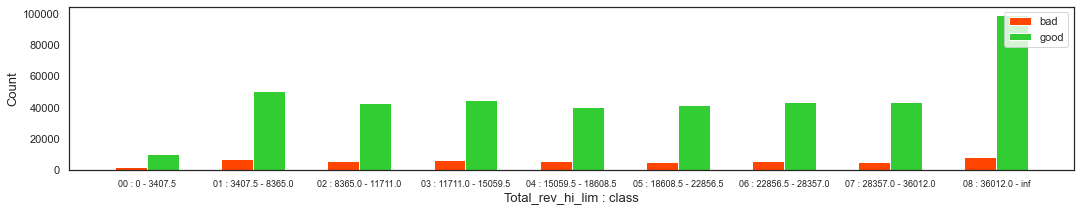

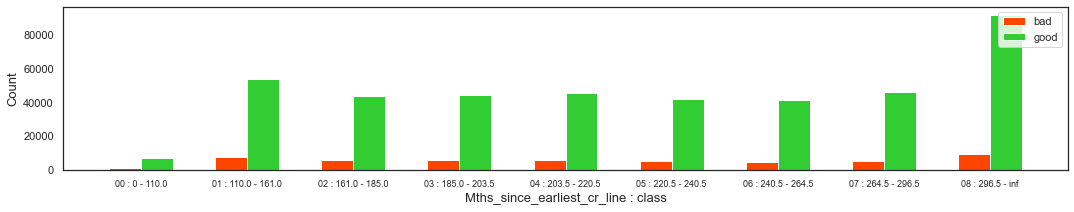

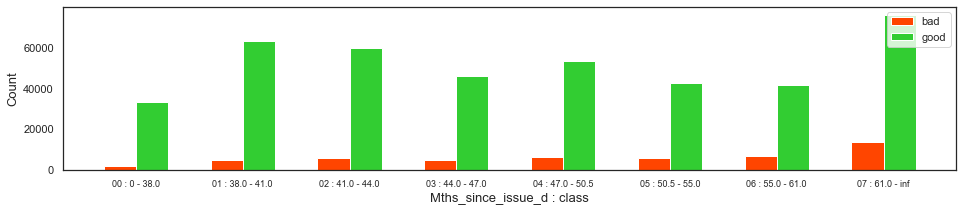

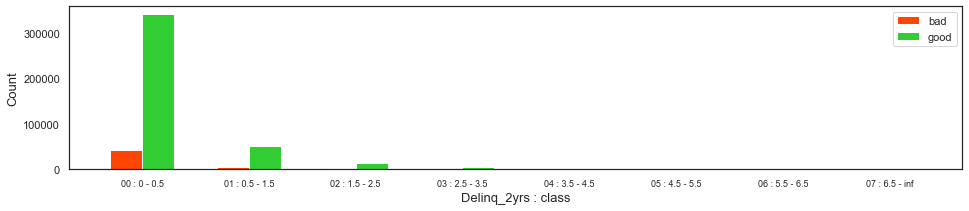

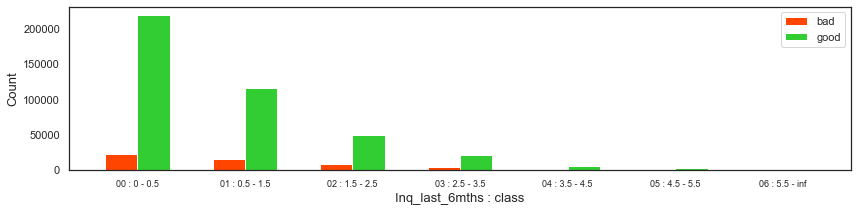

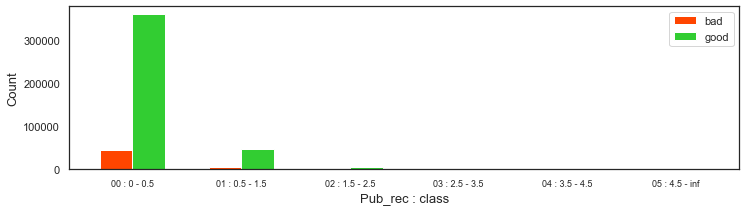

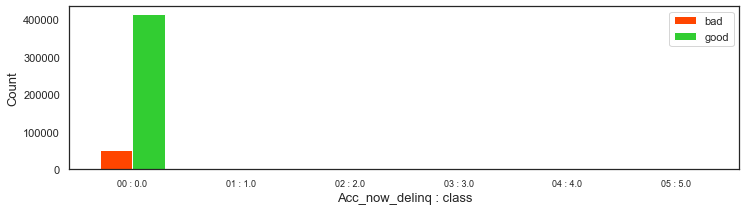

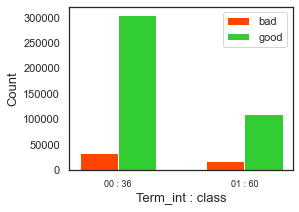

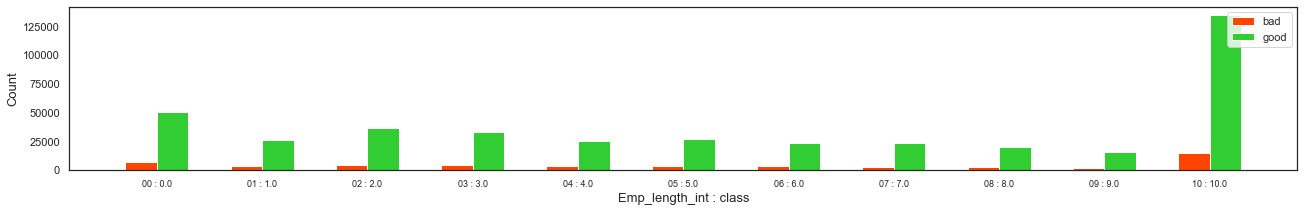

In [41]:
group_cont_cols = ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 
                   'pub_rec', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rev_hi_lim',
                   'mths_since_earliest_cr_line', 'mths_since_issue_d', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
                   'acc_now_delinq', 'term_int', 'emp_length_int']
cap_label = np.vectorize(str.capitalize)
for col_name in group_cont_cols:
    col_name += ' : class'
#     print(col_name, df[col_name].nunique())
    xtick_rot = 0
    if col_name in ['sub_grade']:
        xtick_rot = 90
    plot_df = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad')
    x = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').index.values
    n_cat = len(x)
    bar_width = 0.3
    br1 = np.arange(n_cat)
    br2 = [x + bar_width for x in br1]
    y_bad = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,0].values
    y_good = df.groupby([col_name, 'good_bad'])[col_name].count().unstack('good_bad').iloc[:,1].values
    plt.figure(figsize=(2*n_cat,3))
    plt.bar(br1, y_bad, color='orangered', label='bad', width = bar_width) 
    plt.bar(br2, y_good, color ='limegreen', label='good', width = bar_width)
    plt.xlabel(str.capitalize(col_name), fontsize=13)
    plt.ylabel('Count', fontsize=13)
    plt.xticks([r + bar_width/2 for r in range(n_cat)], x, rotation=xtick_rot, fontsize=9)
    plt.legend(loc='upper right')

In [42]:
categorical_cols = ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 
                   'pub_rec', 'total_acc', 'out_prncp', 'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rev_hi_lim',
                   'mths_since_earliest_cr_line', 'mths_since_issue_d', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
                   'acc_now_delinq', 'term_int', 'emp_length_int']
init_classes = [df[col_name+" : class"].nunique() for col_name in categorical_cols]
final_classes = [get_woe_matrix(df, col_name+" : class")[2] for col_name in categorical_cols]
info_value = [get_woe_matrix(df, col_name+" : class")[1] for col_name in categorical_cols]
cat_col_desc = pd.DataFrame(data=[init_classes, final_classes, info_value], columns=categorical_cols, index=['num_initial_classes','num_final_classes', 'information_value'])
cat_col_desc = cat_col_desc.transpose()
cat_col_desc['predictive_power'] = np.where(cat_col_desc['information_value']<0.02, "None",
                                   np.where(cat_col_desc['information_value']<0.1, "Weak",
                                   np.where(cat_col_desc['information_value']<0.3, "Medium",
                                   np.where(cat_col_desc['information_value']<0.5, "Strong", "Suspiciously High"))))
cat_col_desc

,num_initial_classes,num_final_classes,information_value,predictive_power
funded_amnt,9.0,9.0,0.001547,None
int_rate,9.0,9.0,0.314018,Strong
installment,9.0,9.0,0.003623,None
annual_inc,9.0,9.0,0.053724,Weak
dti,9.0,9.0,0.026025,Weak
delinq_2yrs,8.0,8.0,0.000167,None
inq_last_6mths,7.0,7.0,0.051040,Weak
open_acc,7.0,7.0,0.001630,None
pub_rec,6.0,6.0,0.000962,None
total_acc,8.0,8.0,0.006949,None


## 6) Dummy variables for all columns

In [43]:
df_dummies = []
dummy_cols = ['funded_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'total_acc', 'out_prncp', 
              'total_pymnt', 'total_rec_prncp', 'total_rec_int', 'total_rev_hi_lim', 'mths_since_earliest_cr_line',
              'mths_since_issue_d', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec','acc_now_delinq', 'term_int', 'emp_length_int']

for col_name in dummy_cols:
    df_dummies.append(pd.get_dummies(df[col_name+" : class"], prefix=col_name, prefix_sep=' : '))
    df.drop(col_name, axis=1, inplace=True)
    df.drop(col_name+" : class", axis=1, inplace=True)

df_dummies = pd.concat(df_dummies, axis=1)
df = pd.concat([df, df_dummies], axis=1)
df.head(3)

,good_bad,home_ownership_coarse : OTHER NONE RENT,home_ownership_coarse : OWN MORTGAGE,grade_coarse : G F E D,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : small_business educational renewable_energy moving house other,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : NE IA NV HI FL,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC,pymnt_plan_fine : n,pymnt_plan_fine : y,initial_list_status_fine : f,initial_list_status_fine : w,verification_status_fine : Not Verified,verification_status_fine : Source Verified,verification_status_fine : Verified,funded_amnt : 00 : 0 - 2787.5,funded_amnt : 01 : 2787.5 - 6237.5,funded_amnt : 02 : 6237.5 - 8562.5,funded_amnt : 03 : 8562.5 - 10362.5,funded_amnt : 04 : 10362.5 - 12137.5,funded_amnt : 05 : 12137.5 - 14437.5,funded_amnt : 06 : 14437.5 - 17400.0,funded_amnt : 07 : 17400.0 - 20975.0,funded_amnt : 08 : 20975.0 - inf,int_rate : 00 : 0 - 6.85,int_rate : 01 : 6.85 - 9.08,int_rate : 02 : 9.08 - 10.96,int_rate : 03 : 10.96 - 12.38,int_rate : 04 : 12.38 - 13.58,int_rate : 05 : 13.58 - 14.72,int_rate : 06 : 14.72 - 16.2,int_rate : 07 : 16.2 - 18.04,int_rate : 08 : 18.04 - inf,installment : 00 : 0 - 89.39,installment : 01 : 89.39 - 194.75,installment : 02 : 194.75 - 254.11,installment : 03 : 254.11 - 306.99,installment : 04 : 306.99 - 356.6,installment : 05 : 356.6 - 416.85,installment : 06 : 416.85 - 486.99,installment : 07 : 486.99 - 573.14,installment : 08 : 573.14 - inf,annual_inc : 00 : 0 - 18001.0,annual_inc : 01 : 18001.0 - 38006.5,annual_inc : 02 : 38006.5 - 46004.52,annual_inc : 03 : 46004.52 - 54502.08,annual_inc : 04 : 54502.08 - 62004.5,annual_inc : 05 : 62004.5 - 70006.5,annual_inc : 06 : 70006.5 - 82004.4,annual_inc : 07 : 82004.4 - 97519.0,annual_inc : 08 : 97519.0 - inf,dti : 00 : 0 - 3.52,dti : 01 : 3.52 - 8.58,dti : 02 : 8.58 - 11.34,dti : 03 : 11.34 - 13.64,dti : 04 : 13.64 - 15.82,dti : 05 : 15.82 - 18.0,dti : 06 : 18.0 - 20.3,dti : 07 : 20.3 - 22.87,dti : 08 : 22.87 - inf,open_acc : 00 : 0 - 4.0,open_acc : 01 : 4.0 - 8.5,open_acc : 02 : 8.5 - 10.5,open_acc : 03 : 10.5 - 12.5,open_acc : 04 : 12.5 - 14.5,open_acc : 05 : 14.5 - 17.0,open_acc : 06 : 17.0 - inf,total_acc : 00 : 0 - 7.0,total_acc : 01 : 7.0 - 15.5,total_acc : 02 : 15.5 - 19.0,total_acc : 03 : 19.0 - 22.0,total_acc : 04 : 22.0 - 25.0,total_acc : 05 : 25.0 - 28.5,total_acc : 06 : 28.5 - 33.0,total_acc : 07 : 33.0 - inf,out_prncp : 00 : 0 - 0.01,out_prncp : 01 : 0.01 - 1433.17,out_prncp : 02 : 1433.17 - 4126.09,out_prncp : 03 : 4126.09 - 7160.95,out_prncp : 04 : 7160.95 - 11252.44,out_prncp : 05 : 11252.44 - inf,total_pymnt : 00 : 0 - 1674.72,total_pymnt : 01 : 1674.72 - 4084.7,total_pymnt : 02 : 4084.7 - 5546.35,total_pymnt : 03 : 5546.35 - 6971.52,total_pymnt : 04 : 6971.52 - 8561.83,total_pymnt : 05 : 8561.83 - 10378.8,total_pymnt : 06 : 10378.8 - 12519.91,total_pymnt : 07 : 12519.91 - 15421.94,to

In [44]:
# Drop the one extra dummy variable for each original column
dummy_extra_cols = ['home_ownership_coarse : OTHER NONE RENT', 'grade_coarse : G F E D',
                    'sub_grade_coarse : G1 F5 G5 G3 G2 F4 F3 G4 F2 E5',
                    'purpose_coarse : small_business educational renewable_energy moving house other',
                    'addr_state_coarse : NE IA NV HI FL', 'pymnt_plan_fine : n', 'initial_list_status_fine : f',
                    'verification_status_fine : Not Verified', 'funded_amnt : 00 : 0 - 2787.5', 'int_rate : 00 : 0 - 6.85',
                    'installment : 00 : 0 - 89.39', 'annual_inc : 00 : 0 - 18001.0', 'dti : 00 : 0 - 3.52',
                    'open_acc : 00 : 0 - 4.0', 'total_acc : 00 : 0 - 7.0', 'out_prncp : 00 : 0 - 0.01',
                    'total_pymnt : 00 : 0 - 1674.72', 'total_rec_prncp : 00 : 0 - 1082.51', 'total_rec_int : 00 : 0 - 252.7',
                    'total_rev_hi_lim : 00 : 0 - 3407.5', 'mths_since_issue_d : 00 : 0 - 38.0', 'delinq_2yrs : 00 : 0 - 0.5', 
                    'delinq_2yrs : 01 : 0.5 - 1.5', 'inq_last_6mths : 00 : 0 - 0.5', 'inq_last_6mths : 01 : 0.5 - 1.5',
                    'pub_rec : 00 : 0 - 0.5', 'acc_now_delinq : 00 : 0.0', 'term_int : 00 : 36', 'emp_length_int : 00 : 0.0']
df.drop(dummy_extra_cols, axis=1, inplace=True)
df.head()

,good_bad,home_ownership_coarse : OWN MORTGAGE,grade_coarse : C,grade_coarse : B,grade_coarse : A,sub_grade_coarse : F1 E4 E2,sub_grade_coarse : E3 E1,sub_grade_coarse : D5 D4,sub_grade_coarse : D3,sub_grade_coarse : D2,sub_grade_coarse : D1,sub_grade_coarse : C5,sub_grade_coarse : C4,sub_grade_coarse : C3,sub_grade_coarse : C2,sub_grade_coarse : C1,sub_grade_coarse : B5,sub_grade_coarse : B4,sub_grade_coarse : B3,sub_grade_coarse : B2,sub_grade_coarse : B1,sub_grade_coarse : A5,sub_grade_coarse : A4,sub_grade_coarse : A3 A2,purpose_coarse : medical wedding vacation debt_consolidation,purpose_coarse : home_improvement major_purchase,purpose_coarse : car credit_card,addr_state_coarse : AL NY,addr_state_coarse : LA NM OK,addr_state_coarse : NC,addr_state_coarse : MO MD,addr_state_coarse : NJ,addr_state_coarse : VA,addr_state_coarse : CA,addr_state_coarse : AZ,addr_state_coarse : MI,addr_state_coarse : UT TN,addr_state_coarse : AR PA,addr_state_coarse : RI OH,addr_state_coarse : KY DE MN,addr_state_coarse : SD MA,addr_state_coarse : IN GA,addr_state_coarse : WA,addr_state_coarse : WI OR,addr_state_coarse : TX,addr_state_coarse : IL,addr_state_coarse : CT MT CO,addr_state_coarse : SC KS,addr_state_coarse : VT AK MS ID NH WV WY DC,pymnt_plan_fine : y,initial_list_status_fine : w,verification_status_fine : Source Verified,verification_status_fine : Verified,funded_amnt : 01 : 2787.5 - 6237.5,funded_amnt : 02 : 6237.5 - 8562.5,funded_amnt : 03 : 8562.5 - 10362.5,funded_amnt : 04 : 10362.5 - 12137.5,funded_amnt : 05 : 12137.5 - 14437.5,funded_amnt : 06 : 14437.5 - 17400.0,funded_amnt : 07 : 17400.0 - 20975.0,funded_amnt : 08 : 20975.0 - inf,int_rate : 01 : 6.85 - 9.08,int_rate : 02 : 9.08 - 10.96,int_rate : 03 : 10.96 - 12.38,int_rate : 04 : 12.38 - 13.58,int_rate : 05 : 13.58 - 14.72,int_rate : 06 : 14.72 - 16.2,int_rate : 07 : 16.2 - 18.04,int_rate : 08 : 18.04 - inf,installment : 01 : 89.39 - 194.75,installment : 02 : 194.75 - 254.11,installment : 03 : 254.11 - 306.99,installment : 04 : 306.99 - 356.6,installment : 05 : 356.6 - 416.85,installment : 06 : 416.85 - 486.99,installment : 07 : 486.99 - 573.14,installment : 08 : 573.14 - inf,annual_inc : 01 : 18001.0 - 38006.5,annual_inc : 02 : 38006.5 - 46004.52,annual_inc : 03 : 46004.52 - 54502.08,annual_inc : 04 : 54502.08 - 62004.5,annual_inc : 05 : 62004.5 - 70006.5,annual_inc : 06 : 70006.5 - 82004.4,annual_inc : 07 : 82004.4 - 97519.0,annual_inc : 08 : 97519.0 - inf,dti : 01 : 3.52 - 8.58,dti : 02 : 8.58 - 11.34,dti : 03 : 11.34 - 13.64,dti : 04 : 13.64 - 15.82,dti : 05 : 15.82 - 18.0,dti : 06 : 18.0 - 20.3,dti : 07 : 20.3 - 22.87,dti : 08 : 22.87 - inf,open_acc : 01 : 4.0 - 8.5,open_acc : 02 : 8.5 - 10.5,open_acc : 03 : 10.5 - 12.5,open_acc : 04 : 12.5 - 14.5,open_acc : 05 : 14.5 - 17.0,open_acc : 06 : 17.0 - inf,total_acc : 01 : 7.0 - 15.5,total_acc : 02 : 15.5 - 19.0,total_acc : 03 : 19.0 - 22.0,total_acc : 04 : 22.0 - 25.0,total_acc : 05 : 25.0 - 28.5,total_acc : 06 : 28.5 - 33.0,total_acc : 07 : 33.0 - inf,out_prncp : 01 : 0.01 - 1433.17,out_prncp : 02 : 1433.17 - 4126.09,out_prncp : 03 : 4126.09 - 7160.95,out_prncp : 04 : 7160.95 - 11252.44,out_prncp : 05 : 11252.44 - inf,total_pymnt : 01 : 1674.72 - 4084.7,total_pymnt : 02 : 4084.7 - 5546.35,total_pymnt : 03 : 5546.35 - 6971.52,total_pymnt : 04 : 6971.52 - 8561.83,total_pymnt : 05 : 8561.83 - 10378.8,total_pymnt : 06 : 10378.8 - 12519.91,total_pymnt : 07 : 12519.91 - 15421.94,total_pymnt : 08 : 15421.94 - inf,total_rec_prncp : 01 : 1082.51 - 2672.7,total_rec_prncp : 02 : 2672.7 - 3722.73,total_rec_prncp : 03 : 3722.73 - 4830.41,total_rec_prncp : 04 : 4830.41 - 6116.19,total_rec_prncp : 05 : 6116.19 - 7651.22,total_rec_prncp : 06 : 7651.22 - 9437.74,total_rec_prncp : 07 : 9437.74 - 12075.36,total_rec_prncp : 08 : 12075.36 - inf,total_rec_int : 01 : 252.7 - 657.88,total_rec_int : 02 : 657.88 - 961.11,total_rec_int : 03 : 961.11 - 1274.2,total_rec_int : 04 : 1274.2 - 1628.32,total_rec_int : 05 : 1628.32 - 2049.59,total_rec_int

## 7) Data preprocessing

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [48]:
X_train.shape

(373028, 190)

In [49]:
X_test.shape

(93257, 190)

## 8) Prediction model

In [50]:
from sklearn.svm import LinearSVC

In [51]:
lsvc = LinearSVC()

In [52]:
lsvc.fit(X_train, y_train)

LinearSVC()

In [53]:
train_pred = lsvc.predict(X_train)
test_pred = lsvc.predict(X_test)

In [54]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

In [55]:
print(confusion_matrix(y_train, train_pred))
print()
print(classification_report(y_train, train_pred))
print("AUC score", round(roc_auc_score(y_train, train_pred),4))

[[ 31287   9491]
 [   615 331635]]

              precision    recall  f1-score   support

           0       0.98      0.77      0.86     40778
           1       0.97      1.00      0.98    332250

    accuracy                           0.97    373028
   macro avg       0.98      0.88      0.92    373028
weighted avg       0.97      0.97      0.97    373028

AUC score 0.8827


In [56]:
print(confusion_matrix(y_test, test_pred))
print()
print(classification_report(y_test, test_pred))
print("AUC score", round(roc_auc_score(y_test, test_pred),4))

[[ 7748  2442]
 [  156 82911]]

              precision    recall  f1-score   support

           0       0.98      0.76      0.86     10190
           1       0.97      1.00      0.98     83067

    accuracy                           0.97     93257
   macro avg       0.98      0.88      0.92     93257
weighted avg       0.97      0.97      0.97     93257

AUC score 0.8792
